<div align="center">
  <h2> Méthodes quantitatives en neurosciences </h2>
</div>

<div align="center">
<b><i> Cours NSC-2006, année 2015</i></b><br>
<b>Laboratoire d'analyse de données multidimensionnelle-Réponses</b><br>
     *Pierre Bellec, Yassine Ben Haj Ali*
</div>

### Objectif:

Ce laboratoire a pour but de vous initier à la manipulation
d’informations multidimensionnelles avec Matlab. Nous allons pour cela
analyser des données électrophysiologiques de décharges d’activité
neuronale. Nous allons effectuer différentes opérations visant à
**visualiser**, **résumer** et **modéliser** ces données. Les données
sont tirée de l’expérience de Georgopoulos1982 sur l’encodage
neuronale du mouvement du bras chez un macaque avec des implants
neuronaux. L’animal commence l’expérience en fixant un curseur au centre
d’une cible, ensuite il doit rejoindre des cibles périphériques
apparaissent dans une des 8 directions arrangé en cercle. Une fois 
la cible apparue, l’animal doit attendre ( 100-1500 ms) le signal de départ avant d’aller rejoindre la cible pour
une durée de 500ms, ensuite il retourne au point de départ (au centre).
Cette séquence de mouvement est appelée essai et dans cette expérience
il y en a 47. Le but de l’expérience de Georgopoulos et collègues est de
déterminer l’orientation spatiale préférentielle du neurone en question
dans la région MI, et qu’il est possible de prédire la direction du
mouvement à partir d’enregistrements physiologiques. Leurs résultats
indiquent qu’il y a bel et bien une préférence vers les angles de
mouvement entre 90 et 180 degrés. Durant ce travail nous allons reproduire certaines des analyses de données et
la visualisation des résultats de cette expérience.

Pour réaliser ce laboratoire, il est nécessaire de récupérer les
resources suivantes sur [studium](https://studium.umontreal.ca/):

-   Chap17_Data.mat: le jeu de données tiré de Georgopoulos1982.

-   Les scripts `diagramme_dispersion.m` et `diagramme_dispersion_essais.m` pour la Section 1.

-   Les scripts `histogramme_essai1.m`, `histogramme_essais.m` pour la Section 2.

Notez que le laboratoire est noté. Il faudra remettre un rapport
détaillé incluant une réponse pour l’ensemble des questions numérotées
ci dessous. Chaque réponse fera typiquement quelques lignes, incluant du
code et une figure si demandé dans l’énoncé.

Ne pas tenir compte et ne pas executer cette partie du code:

In [16]:
%matplotlib inline
from pymatbridge import Octave
octave = Octave()
octave.start()
%load_ext pymatbridge

Starting Octave on ZMQ socket ipc:///tmp/pymatbridge
Send 'exit' command to kill the server
.Octave started and connected!
The pymatbridge extension is already loaded. To reload it, use:
  %reload_ext pymatbridge


### Section 1 : Diagramme de dispersion

Nous allons commencer par effectuer un **diagramme de dispersion**
(scatter plot) de l’activation d’un neurone tout au long de la durée
d’un essai. Voir le script pour suivre ces étapes.

<ol start="1">
  <h4><li>Commençons par charger les données:</li></h4>
</ol>

In [56]:
%%matlab
load('Chap17_Data')

<ol start="2">
  <h4><li>La commande `whos` nous permet de déterminer quelles variables sont disponibles dans l’espace de travail, ainsi que leur type.</li></h4>
</ol>

In [18]:
%%matlab
whos

Variables in the current scope:

   Attr Name             Size                     Bytes  Class
   ==== ====             ====                     =====  ===== 
        ans              1x2                         16  double
        direction      158x1                       1264  double
        go             158x1                       1264  double
        instruction    158x1                       1264  double
        num_temps        1x1                          8  double
        spike            1x47                     24296  struct
        t1              52x1                        416  double
        t2              51x1                        408  double
        unit             1x143                 11808319  struct

Total is 770 elements using 11837255 bytes



- Quelles variables sont présentes? Quel est le type de la variable spike? Quelle est sa taille?

    Les variables sont direction, go, intruction, spike et unit. La variable spike est de type structure et de taille 1x47

<ol start="3">
  <h4><li>La variable spike contient les temps des potentiels d’action détecté pour
    un neurone. Chaque entrée de la structure contient les données d’un
    essai différent. Il est possible de lister les champs de la
    structure avec la commande fieldnames:</li></h4>
</ol>

In [31]:
%%matlab
fieldnames(spike)

ans = 
{
  [1,1] = times
}


    Le champ "spikes(1).times" contient les temps de décharges de potentiels d’action pour
    le premier essai. La commande permet de déterminer la taille de ce
    vecteur, c’est à dire le nombre de décharges détectées:

In [32]:
%%matlab
size(spike(1).times)

ans =

   52    1



- Combien y-a-t-il eu de décharges pour l’essai 2? pour l’essai 10?

In [33]:
%%matlab
size(spike(2).times) %nb de décharges pour l'essai 2

ans =

   51    1



In [34]:
%%matlab
size(spike(10).times) %nb de décharges pour l'essai 10

ans =

   85    1



<ol start="4">
  <h4><li> La commande suivante va présenter l’ensemble des temps de décharge pour l’essai 1. </li></h4>
</ol>

```       
        >> spike(1).times
           -0.9893
           -0.9402
           -0.9158
        (...) 
```

-    Quelle est l’unité probable de ces temps? Pourquoi y-a-t-il des
    valeurs négatives?

    l'unité est en millisecondes et les valeurs négatives indiquent un temps de décharge qui précède le signal de départ le de l'expérience

<ol start="5">
  <h4><li> On extrait les temps de décharges des deux premiers essais dans deux
    variables et : </li></h4>
</ol>


In [35]:
 %%matlab
 t1 = spike(1).times; 
 t2 = spike(2).times; 

<ol start="6">
  <h4><li> On ouvre une nouvelle fenêtre, dédiée à la visualisation: </li></h4>
</ol> 

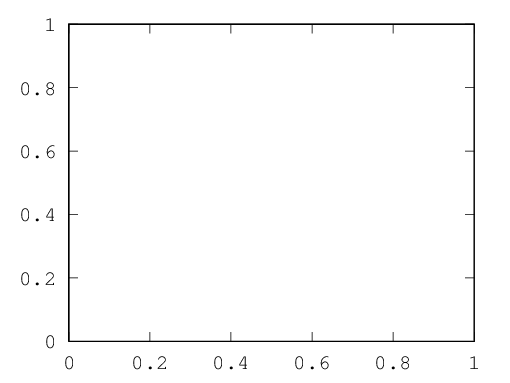

In [36]:
%%matlab
figure 
hold on 

    Attention à la deuxième instruction! Elle permet de dessiner
    plusieurs objets sur une même figure, l’un à la suite de l’autre,
    sans ré-initialiser la figure.

<ol start="7">
  <h4><li> Maintenant on va tracer la première ligne du diagramme. Notez que le
    nombre de décharges dans l’essai 1 est . On applique une boucle : </li></h4>
</ol>

fig1 =  1


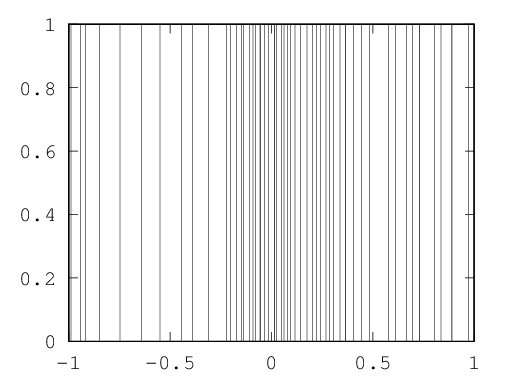

In [41]:
%%matlab
for num_temps = 1:length(t1) 
    line([t1(num_temps) t1(num_temps)], [0 1]) 
end

    Notez l’utilisation de la commande line.

<ol start="8">
  <h4><li> On va maintenant ajouter un label sur l’axe des x et y . </li></h4>
</ol>

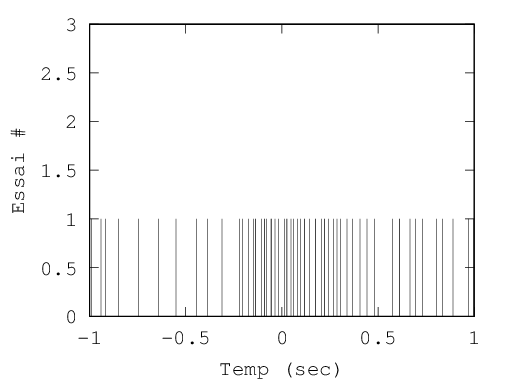

In [52]:
%%matlab
for num_temps = 1:length(t1) 
    line([t1(num_temps) t1(num_temps)], [0 1]) 
end
xlabel('Temp (sec)'); 
%Idem pour l’axe des y:
ylabel('Essai #')
%Enfin, on fixe les limites de l’axe des y
ylim([0 3])

%Sauvegardez la figure dans un fichier au format png (utilisez la commande "print" ), sous le nom "figure_dispersion.png". 
print ( 'figure_dispersion' , '-dpng')

%Le résultat ressemble à la figure qui suit:

<ol start="10">
  <h4><li> Faire une nouvelle figure où chaque barre du diagramme a une hauteur
    de 0.5, plutôt que 1. Sauvegardez ce fichier sous le nom "figure_dispersion_lignes.png". </li></h4>
</ol>

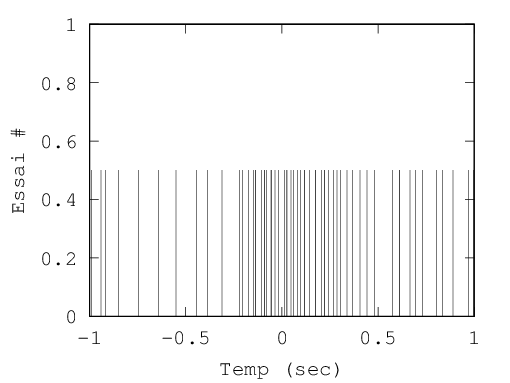

In [53]:
%%matlab
for num_temps = 1:length(t1) 
    line([t1(num_temps) t1(num_temps)], [0 0.5]) 
end
xlabel('Temp (sec)')
%Idem pour l’axe des y:
ylabel('Essai #')
%Enfin, on fixe les limites de l’axe des y
ylim([0 1])

<ol start="11">
  <h4><li> Vous allez compléter, à partir du fichier , les 4 lignes de code
    manquante à l’interieure de la boucle pour tracer tous les essais
    (47) dans une même figure. Le résultat ressemblerait à la figure
    suivante: </li></h4>
</ol>

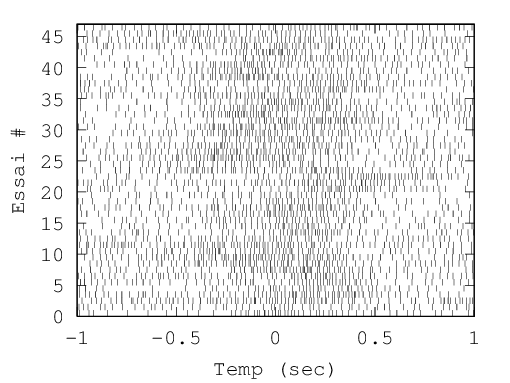

In [54]:
%%matlab
% Charger les donnees
load('Chap17_Data')
% Preparer une figure
figure 
% permettre la superposition de plusieurs graphiques dans la meme figure
hold on 
% Donner un label à l'axe des x
xlabel('Temp (sec)'); 
% Donner un label à l'axe des y
ylabel('Essai #');
% Ajuster les limites de l'axe des y
ylim([0 length(spike)]);

for num_spike = 1:length(spike) %faire une boucle pour tout les essaies
    t = spike(num_spike).times; %definir la variable pour chaque essai
    for num_temps=1:length(t) %faire une boucle pour tous les points temps
        line([t(num_temps) t(num_temps)], [0+(num_spike-1) 1+(num_spike-1)]); %dessiner une line pour chaque point temps t1(i) avec longueur de 1
    end
end

### Section 2 : Histogramme

Nous allons continuer l’exploration des données à travers un histogramme
qui résumerait la somme des activations dans un intervalle de temps
donné. Voir le script `histograme_essai1.m` pour reproduire les commandes suivantes:

1.  Commençons par nettoyer l’espace de travail:

            >> clear
            

2.  Chargeons de nouveau les données:

            >> load('Chap17_Data')  
            

3.  Définissant les bords et le pas des l’histogramme

            >> centres = [-0.95:0.1:0.95];

            

4.  Initialiser une matrice de zéros dont la longueur est égale au
    nombre d’intervalles:

            >> histo = zeros(1,length(centres));

            

5.  Récupérez le nombre de décharges par intervalle de temps dans
    l’essai numéro 1, à l’aide avec la fonction .

            >> histo = hist(spike(1).times,centres); 

            

    Examinez le contenu de la variable . Quelle est sa taille ? Son
    minimum, maximum, sa moyenne (voir les fonctions matlab , , ).

6.  Dessinez l’histogramme avec la fonction

            >> bar(centres,histo); 

7.  Ajuster les limites de l’axe des x

            >> xlim([-1.1 1]);

8.  Donner un label à l’axe des x

            >> xlabel('Temps (sec)');
            

9.  Donner un label à l’axe des y

            >> ylabel('# essai');
            

10. Reprenez le code du fichier et remplissez la boucle afin de réaliser
    un histogramme pour l’ensemble des essais

Régression
==========

Nous allons maintenant implémenter une régression à l’aide de Matlab.

1.  Commençons par nettoyer l’espace de travail:

            >> clear
            

2.  Maintenant nous allons **récuperer** les données de “notes” du
    cours.

            >> x = [ 165 165 157 170 175 165 182 178 ]';
            >> y = [  47  56  49  60  82  52  78  90 ]';
            

    Quels sont la taille et le contenu des vecteurs et . A quoi sert
    l’opération ?

3.  On définit une nouvelle fonction en ligne:

            >> ftheta = inline('theta(1)+theta(2)*x','theta','x');

            

    Quel est le type de la variable ?

4.  Estimez les coefficients de régression à l’aide de la fonction :

            >> theta_chap = nlinfit(x, y, ftheta, [1 1] );

            

    Quelles sont les valeurs de ? A quoi sert l’argument
    `basicstyle=\lstbasicfont\small]|`1 1]|? Essayez de reproduire
    l’estimation avec d’autres valeurs pour cet argument, est-ce que
    cela affecte le résultat?

5.  Maintenant représenter le résultat de la régression.

            >> figure
            >> plot(x,y,'b.');
            >> hold on
            >> plot(x,ftheta(theta_chap,x),'r');
            

6.  Utilisez la fonction pour changer les limites de l’axe y de 40 à 95.
    Ajouter le label sur l’axe des x avec la commande , et le label sur
    l’axe des y avec la commande . Faites une sauvegarde de cette image,
    dans un fichier .

7.  Maintenant nous allons ajuster une courbe plus complexe, un cosinus.
    On commence par simuler des données:

            >> clear
            >> x = 0:0.1:30;
            >> y = cos(x) + randn(1,301); 

            

    Quelle est la taille de x? La taille de y? A quoi sert la fonction
    (utilisez la commande ). Générer un graphe de la relation entre et ,
    et sauvegardez cette image dans un fichier .

8.  On va maintenant définir une fonction de trois paramètres:

            >> ftheta = inline('theta(1)+theta(2)*cos(x-theta(3))','theta','x');

            

    Quelle est la valeur de la fonction pour
    `basicstyle=\lstbasicfont\small]|theta=`0 1 1]| et ?

9.  Estimez les coefficients de régression à l’aide de la fonction :

            >> theta_chap = nlinfit(x, y, ftheta, [0 1 1] );
            

    Quelles sont les valeurs de ? A quoi sert l’argument
    `basicstyle=\lstbasicfont\small]|`0 1 1]|? Essayez de reproduire
    l’estimation avec d’autres valeurs pour cet argument, est-ce que
    cela affecte le résultat?

In [ ]:
10. Maintenant représenter le résultat de la régression.

In [ ]:
            >> figure
            >> plot(x,y,'b');
            >> hold on
            >> plot(x,ftheta(theta_chap,x),'r');
            

In [ ]:
    Faites une sauvegarde de cette image, dans un fichier .